In [5]:
rnn_loss_list=[1,2,3,4,5,6]
lstm_loss_list=[0,1,2,3,4,5]
n_epoch=len(rnn_loss_list)

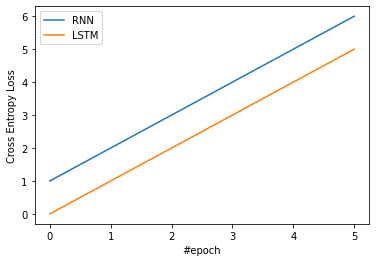

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(n_epoch), rnn_loss_list)
plt.plot(range(n_epoch), lstm_loss_list)
plt.legend(["RNN", "LSTM"])
plt.xlabel("#epoch")
plt.ylabel("Cross Entropy Loss")
plt.show()